# Step 0. 의료 데이터셋

### 의료 데이터 수집
### 의료 데이터 분석의 현재
### Accuracy, Precision, 그리고 Recall

###데이터 소개

- 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.

- 다음 1개의 csv 파일을 사용합니다.
heart_failure_clinical_records_dataset.csv

- 각 파일의 컬럼은 아래와 같습니다.

age: 환자의 나이
anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)

creatinine_phosphokinase: 크레아틴키나제 검사 결과

diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)

ejection_fraction: 박출계수 (%)

high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)

platelets: 혈소판 수 (kiloplatelets/mL)

serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)

serum_sodium: 혈중 나트륨 레벨 (mEq/L)

sex: 성별 (0: 여성, 1: 남성)

smoking: 흡연 여부 (0: 비흡연, 1: 흡연)

time: 관찰 기간 (일)

DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

# Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 문제 1. Kaggle API 세팅하기

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'hyoungsunchoi'
os.environ['KAGGLE_KEY'] = '960998973b796b89acfa955c569f8e2f'

## 문제 2. 데이터 다운로드 및 압축 해제하기

In [3]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!unzip '*.zip'

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 7.07MB/s]
Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [4]:
!ls

heart-failure-clinical-data.zip		    sample_data
heart_failure_clinical_records_dataset.csv


In [5]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Step 2. EDA 및 데이터 기초 통계 분석

## 문제 4. 데이터프레임의 각 컬럼 분석하기

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


## 문제 5. 수치형 데이터 히스토그램 그리기

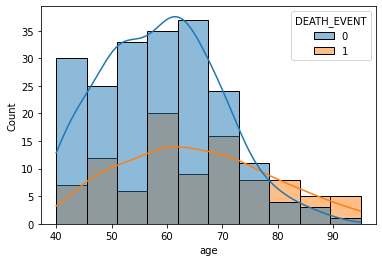

In [10]:
# seaborn 의 histplot, jointplot, pairplot 을 이용해 히스토그램 그리기
# Kde plot 까지 활용하기 kde=True 
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)


In [11]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

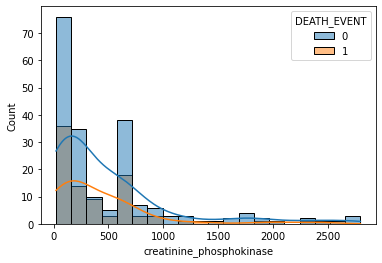

In [12]:
# 아웃라이어가 굉장히 많은것을 알 수 있다.
#sns.histplot(x='creatinine_phosphokinase', data=df, hue='DEATH_EVENT', kde=True)

# 3000 이상은 배제하는것이 좋다~
sns.histplot(x='creatinine_phosphokinase', data=df.loc[df['creatinine_phosphokinase']<3000], hue='DEATH_EVENT', kde=True)

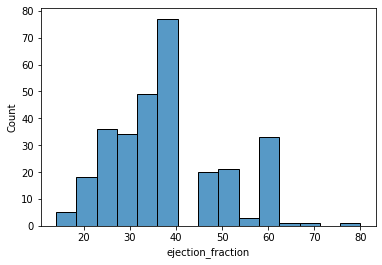

In [13]:
# 중간에 값이 비어있는 경우 bin 을 줄여주면된다
sns.histplot(x='ejection_fraction', data=df)

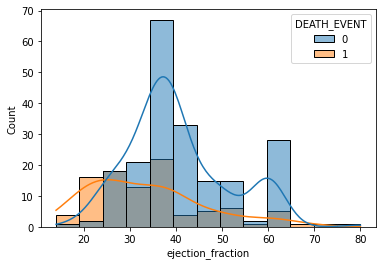

In [14]:
sns.histplot(x='ejection_fraction', data=df, bins=13, hue='DEATH_EVENT', kde=True)
# 관측결과
# ejection_fraction 이 낮을수록 사망자가 더 많은 것을 확인.


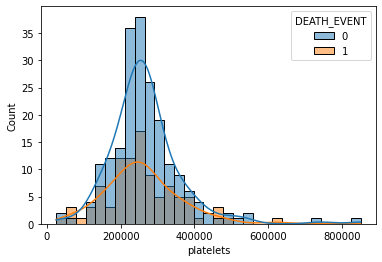

In [15]:
# 혈소판 관측
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT', kde=True)
# 연관성이 없어보임

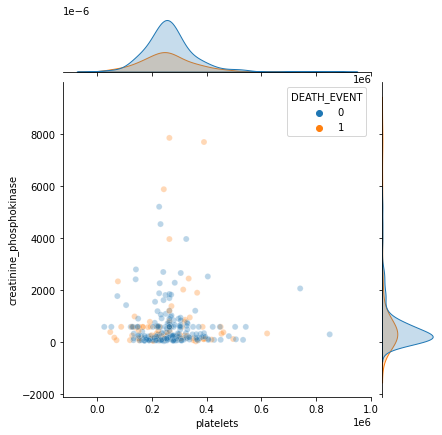

In [16]:
# jointplot 은 Classfication  모델에 주로 활용
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)

## 문제 6. Boxplot 계열 이용하여 범주별 통계 확인하기

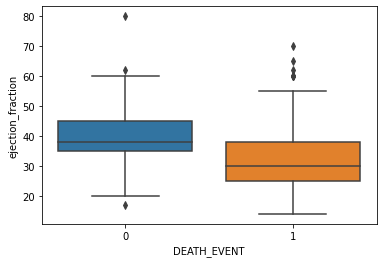

In [17]:
# seaborn 의 violinplot, boxplot, swarmplot 을 활용한다
# hue 키워드를 사용하여 범주 세분화가 가능하다
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

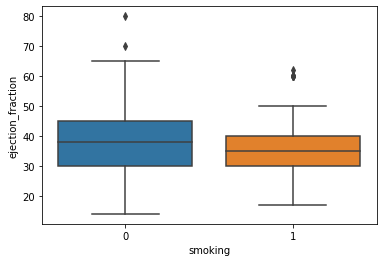

In [18]:
sns.boxplot(x='smoking', y='ejection_fraction', data=df)
# 흡연 여부에 따라 ejection_fraction 값의 범위가 좁아지는 것을 확인

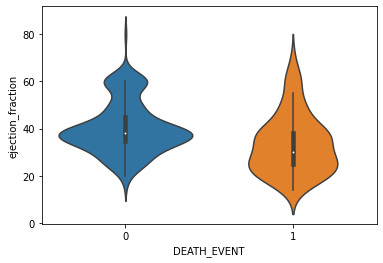

In [19]:
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

# Step 3 . 모델 학습을 위한 데이터 전처리

## 문제 7 . StandardScaler를 이용하여 데이터 전처리하기

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [31]:
X_num = df[['age', 'creatinine_phosphokinase',
       'ejection_fraction',  'platelets',
       'serum_creatinine', 'serum_sodium', 'time']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure',  'sex', 'smoking']]
y=df['DEATH_EVENT']

In [32]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
# standardScaler 적용시 ndarray 형태로 반환
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,1.803451,0,1,1,1,1
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,1.816357,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,1.906697,0,1,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,1.932509,0,0,0,1,1


## 문제 8. 학습데이터와 테스트데이터 구분하기

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## 문제 9. Classification 모델 학습하기

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
# 안에 매개변수 값 변경 가능하다
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 문제 10. 모델 학습 결과 평가하기

In [42]:
from sklearn.metrics import classification_report

In [43]:
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        55
           1       0.81      0.65      0.72        20

    accuracy                           0.87        75
   macro avg       0.85      0.80      0.82        75
weighted avg       0.86      0.87      0.86        75



## 문제 11. XGBoost 모델 생성/학습하기

In [44]:
from xgboost import XGBClassifier

In [45]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## 문제 12. 모델 학습 결과 평가하기

In [48]:
pred=model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        55
           1       0.83      0.75      0.79        20

    accuracy                           0.89        75
   macro avg       0.87      0.85      0.86        75
weighted avg       0.89      0.89      0.89        75



## 문제 13. 특징의 중요도 확인하기

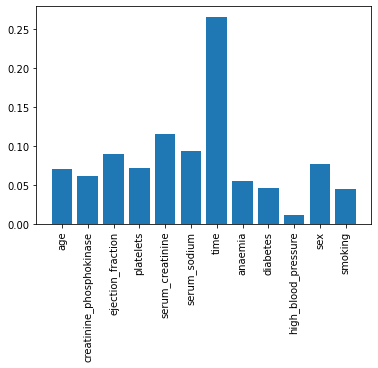

In [52]:
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

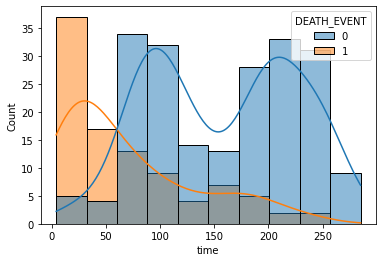

In [53]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)

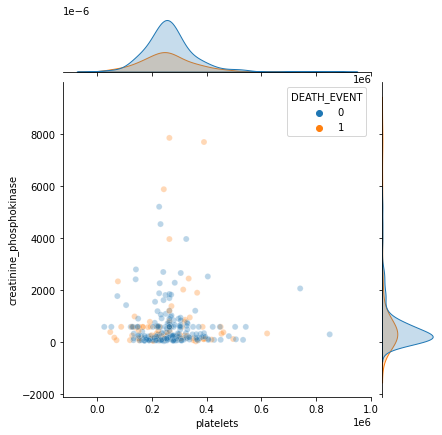

In [54]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)

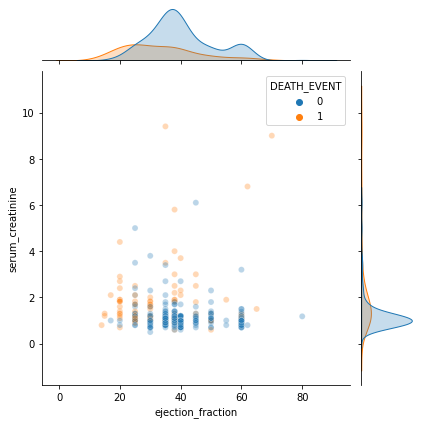

In [56]:
sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT', alpha=0.3)

# Step 4. 모델 학습 결과 심화 분석하기

## 문제 14. Precision-Recall 커브 확인하기

In [57]:
from sklearn.metrics import plot_precision_recall_curve

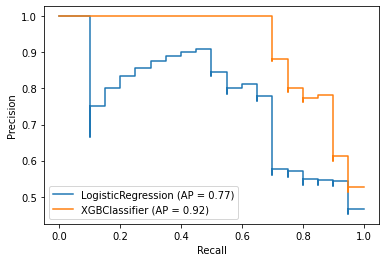

In [60]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기
fig = plt.figure()
ax=fig.gca()

plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)

## 문제 15. ROC커브 확인하기

In [61]:
from sklearn.metrics import plot_roc_curve

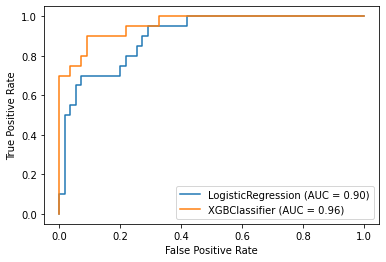

In [62]:
fig = plt.figure()
ax=fig.gca()

plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)